## 一、KNN分类器  
### 1.初始化函数__init__(k=5)  
初始化k值，若无传入参数，默认为5

In [ ]:
def __init__(self,k=5):
    self.k = k

### 2.距离函数euclidean_distance(one_sample,X_train)  
计算一个测试样本与所有训练样本的欧式距离：  
$D_{ij}=\sqrt{|x_{i1}-x_{j1}|^2+|x_{i2}-x_{j2}|^2+...+|x_{im}-x_{jm}|^2}$

In [ ]:
def euclidean_distance(self,one_sample,X_train):
    #将测试样本变成只有1行
    one_sample = one_sample.reshape(1,-1)
    X_train = X_train.reshape(X_train.shape[0],-1)
    #将测试样本沿y轴复制，使其行数等于训练样本行数
    X_test = np.tile(one_sample,(X_train.shape[0],1))
    #计算测试样本与每一个训练样本的欧氏距离
    distance_arr = np.sqrt(np.power(X_test - X_train,2).sum(axis=1))
    return distance_arr

### 3.获取标签函数get_k_neighbor_labels(distances,y_train,k)  
获取k个最近邻的类别(标签)，用的是最简单的先排序，在选取前k个标签，未使用KD树的方法

In [ ]:
def get_k_neighbor_labels(self,distances,y_train,k):
    k_neighbor_labels = []
    #按照距离排序选择前k个获取标签
    for distance in np.sort(distances)[:k]:
        label = y_train[distances==distance]
        k_neighbor_labels.extend(label)
    #将返回k个近邻标签列表转为数组，并只有一行
    return np.array(k_neighbor_labels).reshape(-1, )

### 4.投票函数vote(one_sample,X_train,y_train,k)  
投票得出这个样本所属类别

In [ ]:
def vote(self,one_sample,X_train,y_train,k):
    #获取测试集所有样本与训练集欧氏距离的数组
    Distances = self.euclidean_distance(one_sample,X_train)
    y_train = y_train.reshape(y_train.shape[0],1)
    #获取最近k个近邻的标签数组
    self.knn_labels_arr = self.get_k_neighbor_labels(Distances,y_train,k)
    #初始化标签和数
    find_label,find_count = 0,0
    #使用Counter统计每个标签出现次数，label为标签，count为标签出现次数
    for label,count in Counter(self.knn_labels_arr).items():
        if count > find_count:
            find_count = count
            find_label = label
    return find_label

### 5.预测函数predict(X_test,X_train,y_train)  
将测试集传入，并得到每一个测试样本的预测类别

In [ ]:
def predict(self,X_test,X_train,y_train):
    y_pred = []
    #获取每个测试样本的预测标签
    for sample in X_test:
        label = self.vote(sample,X_train,y_train,self.k)
        y_pred.append(label)
    return np.array(y_pred)

### 6.计算精确度函数accuracy(y,y_pred)

In [ ]:
def accuracy(self,y,y_pred):
    y=y.reshape(y.shape[0],-1)
    y_pred=y_pred.reshape(y_pred.shape[0],-1)
    return np.sum(y==y_pred)/len(y)

## 二、KNN函数  
为了省事，写了一些函数，方便观察不同k值的模型情况，从而找到较好的模型

### 1.求不同k值下最佳k值和准确率K_acc(X_train,X_test,y_train,y_test,k_arr)

In [ ]:
#根据k取值列表，计算各取值的精确率
def K_acc(self,X_train,X_test,y_train,y_test,k_arr):
    self.k_value = k_arr
    self.accu_value=[]
    self.accu_best,self.k_best = 0, 0
    for k in self.k_value:
        model = KnnClassifier.KNN(k)
        y_pred = model.predict(X_test,X_train,y_train)
        accu = model.accuracy(y_test,y_pred)
        if accu > self.accu_best:
            self.k_best = k
            self.accu_best = accu
        self.accu_value.append(accu)

### 2.绘制不同k值和准确率图plot_K_acc()

In [ ]:
def plot_K_acc(self):
    figure = plt.figure(figsize=(8,6))
    ax = figure.add_subplot(1,1,1)
    ax.plot(self.k_value,self.accu_value,color='red',marker='*',lw=1)
    plt.xticks(self.k_value, rotation=0) 
    ax.set_xlabel(r"k_value")
    ax.set_ylabel(r"acc")
    ax.set_title("k value and accuracy")
    plt.show()

## 三、导入数据集  
这里使用sklearn自带的digits手写数字数据集来测试  
### 导入库

In [7]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter

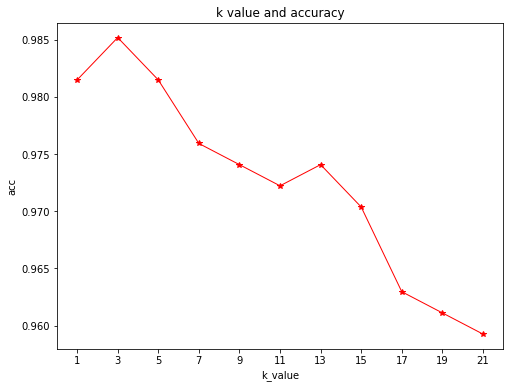

精确率最高的k值： 3 精确率： 0.985185185185


In [8]:
#加载digits数据集
digits = datasets.load_digits()
digits_X = digits.data   ##获得数据集输入
digits_y = digits.target ##获得数据集标签
#划分训练集和测试集
X_train,X_test,y_train,y_test = train_test_split(digits_X, digits_y, test_size = 0.3)
k_value = np.arange(1,22,2).tolist()#设置k_value为1到22的奇数
##加载最近邻模型
KF = KnnFunction()
KF.K_acc(X_train,X_test,y_train,y_test,k_value)
KF.plot_K_acc()
print("精确率最高的k值：",KF.k_best,"精确率：",KF.accu_best)